<a href="https://colab.research.google.com/github/HariRags/EmoSense/blob/main/WIDS_week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import re
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
from nltk.corpus import stopwords as sw
from nltk.stem.porter import PorterStemmer as ps
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()

In [4]:
df=pd.read_csv('/content/drive/MyDrive/twitter_data.csv',on_bad_lines='skip')
original_df= df.copy(deep = 'true')
df

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [5]:
df=df.drop(labels= ['ItemID','SentimentSource'], axis= 1)
df['SentimentText'] = df['SentimentText'].str.replace('[^a-zA-Z]', ' ')
df['SentimentText'] = df['SentimentText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['SentimentText'] = df['SentimentText'].str.lower()
df['SentimentText'] = df['SentimentText'].str.split()
df

<ipython-input-5-14d047ffd0cd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SentimentText'] = df['SentimentText'].str.replace('[^a-zA-Z]', ' ')
<ipython-input-5-14d047ffd0cd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SentimentText'] = df['SentimentText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')


,Sentiment,SentimentText
0,0,"[is, so, sad, for, my, apl, friend]"
1,0,"[i, missed, the, new, moon, trailer]"
2,1,"[omg, its, already, o]"
3,0,"[omgaga, im, sooo, im, gunna, cry, i, ve, been..."
4,0,"[i, think, mi, bf, is, cheating, on, me, t, t]"
...,...,...
1578607,1,"[zzzzzz, finally, night, tweeters]"
1578608,1,"[zzzzzzz, sleep, well, people]"
1578609,0,"[zzzzzzzzzz, wait, no, i, have, homework]"
1578610,0,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a..."


In [6]:
stopwords=sw.words('english')

In [7]:
def remove_stopwords(text):
    stopword_list=[i for i in text if i not in stopwords]
    return stopword_list

In [8]:
df['SentimentText']= df['SentimentText'].apply(lambda x: remove_stopwords(x))
df

,Sentiment,SentimentText
0,0,"[sad, apl, friend]"
1,0,"[missed, new, moon, trailer]"
2,1,"[omg, already]"
3,0,"[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,0,"[think, mi, bf, cheating]"
...,...,...
1578607,1,"[zzzzzz, finally, night, tweeters]"
1578608,1,"[zzzzzzz, sleep, well, people]"
1578609,0,"[zzzzzzzzzz, wait, homework]"
1578610,0,"[zzzzzzzzzzzzz, meh]"


In [9]:
df['SentimentText']= df['SentimentText'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [10]:
df['SentimentText']

0                                         [sad, apl, friend]
1                               [missed, new, moon, trailer]
2                                             [omg, already]
3          [omgaga, im, sooo, im, gunna, cry, dentist, si...
4                                  [think, mi, bf, cheating]
                                 ...                        
1578607                    [zzzzzz, finally, night, tweeter]
1578608                       [zzzzzzz, sleep, well, people]
1578609                         [zzzzzzzzzz, wait, homework]
1578610                                 [zzzzzzzzzzzzz, meh]
1578611                          [zzzzzzzzzzzzzzzzzzz, wish]
Name: SentimentText, Length: 1578612, dtype: object

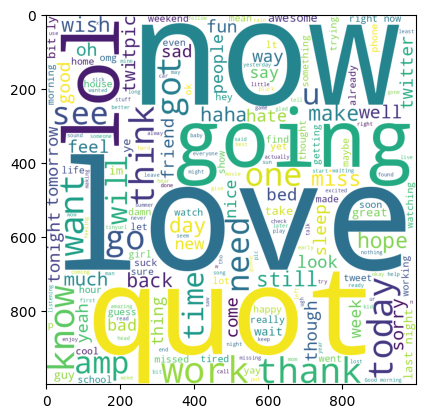

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text =' '.join([words for words in original_df['SentimentText']])

wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(text)
plt.imshow(wordcloud)

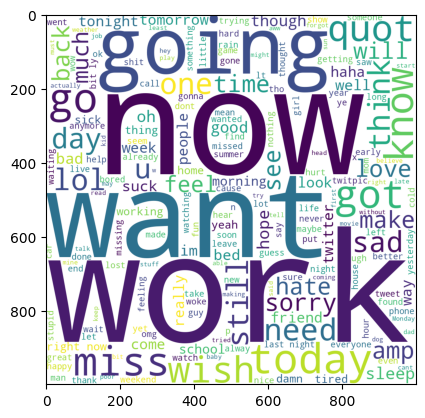

In [17]:
positive_text =' '.join([words for words in original_df['SentimentText'][original_df['Sentiment'] == 0]])

wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(positive_text)
plt.imshow(wordcloud)

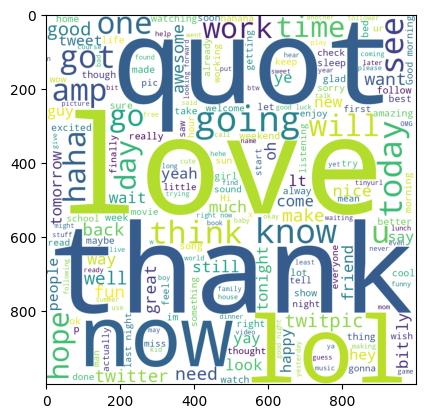

In [18]:
negative_text =' '.join([words for words in original_df['SentimentText'][original_df['Sentiment'] == 1]])

wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(negative_text)
plt.imshow(wordcloud)

In [34]:
df['positive_sentence_length']=df['SentimentText'].str.len()[df['Sentiment'] == 0]
df['negative_sentence_length']=df['SentimentText'].str.len()[df['Sentiment'] == 1]
longest_positive_text= df['positive_sentence_length'].idxmax()
longest_negative_text= df['negative_sentence_length'].idxmax()
df.loc[:, 'positive_sentence_length'].mean()


7.775972654689353

In [28]:
df.loc[:, 'negative_sentence_length'].mean() #therfore there is no difference in the average length of depressed adn not depressed tweets

7.787331192884632

<Axes: >

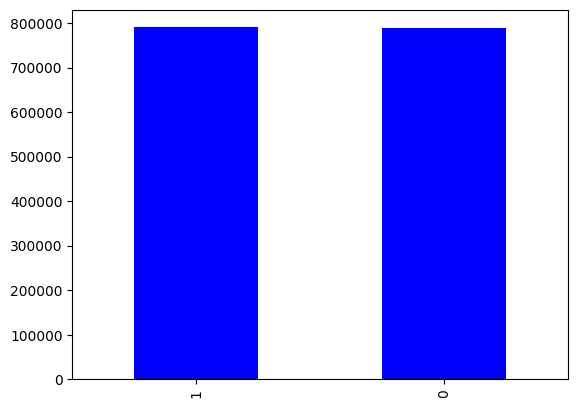

In [29]:
df['Sentiment'].value_counts().plot.bar(color = 'blue')

In [40]:
str(df['SentimentText'][longest_positive_text])

"['http', 'bit', 'ly', 'thy', 'p', 'lt', 'v', 'n', 'nh', 'h', 'x', 'ko', 'bao', 'gi', 'c', 'n', 'n', 'n', 'nh', 'kh', 'ng', 'th', 'hi', 'u', 'quot', 'gi', 'n', 'ng', 'l', 'th', 'quot', 'l', 'gi', 'n', 'ng', 'c', 'ki', 'u', 'kh', 'g']"

In [41]:
str(df['SentimentText'][longest_negative_text])

"['thriving', 'ivory', 'song', 'quot', 'twilight', 'quot', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'gt', 'twilight']"